In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import recall_score # recall_score(y_true, y_pred, average='macro')

In [2]:
train = pd.read_csv('../input/predicting-the-risk-cardiovascular-disease/train_dataset_train/train.csv', index_col=0)
test = pd.read_csv('../input/predicting-the-risk-cardiovascular-disease/test_dataset_test.csv', index_col=0)
sample_sub = pd.read_csv('../input/predicting-the-risk-cardiovascular-disease/train_dataset_train/sample_solution.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 955 entries, 54-102-358-02 to 54-702-016-01
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Пол                                    954 non-null    object 
 1   Семья                                  955 non-null    object 
 2   Этнос                                  955 non-null    object 
 3   Национальность                         955 non-null    object 
 4   Религия                                955 non-null    object 
 5   Образование                            955 non-null    object 
 6   Профессия                              955 non-null    object 
 7   Вы работаете?                          955 non-null    int64  
 8   Выход на пенсию                        955 non-null    int64  
 9   Прекращение работы по болезни          955 non-null    int64  
 10  Сахарный диабет                        955 non-null    in

In [4]:
remove_col = ['ID_y']
target_cols = ['Артериальная гипертензия', 'ОНМК', 'Стенокардия, ИБС, инфаркт миокарда', 'Сердечная недостаточность',\
              'Прочие заболевания сердца']

In [5]:
train.head()

,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,...,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",ID_y,Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
ID,,,,,,,,,,,,,,,,,,,,,
54-102-358-02,М,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,низкоквалифицированные работники,1,0,0,...,06:00:00,0,0,0,54-102-358-02,0,0,0,0,0
54-103-101-01,Ж,в разводе,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,0,0,...,04:00:00,1,0,0,54-103-101-01,1,1,0,0,0
54-501-026-03,Ж,в браке в настоящее время,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,0,0,...,07:00:00,0,0,0,54-501-026-03,0,0,0,0,0
54-501-094-02,М,в браке в настоящее время,европейская,Русские,Атеист / агностик,3 - средняя школа / закон.среднее / выше среднего,низкоквалифицированные работники,1,0,0,...,07:00:00,0,0,0,54-501-094-02,1,0,0,0,0
54-503-022-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,операторы и монтажники установок и машинного о...,0,0,1,...,06:00:00,0,0,0,54-503-022-01,1,0,1,1,0


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 638 entries, 54-001-019-01 to 54-103-022-01
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Пол                                    638 non-null    object 
 1   Семья                                  638 non-null    object 
 2   Этнос                                  638 non-null    object 
 3   Национальность                         638 non-null    object 
 4   Религия                                638 non-null    object 
 5   Образование                            638 non-null    object 
 6   Профессия                              638 non-null    object 
 7   Вы работаете?                          638 non-null    int64  
 8   Выход на пенсию                        638 non-null    int64  
 9   Прекращение работы по болезни          638 non-null    int64  
 10  Сахарный диабет                        638 non-null    in

In [7]:
test.head()

,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,...,Сигарет в день,Пассивное курение,Частота пасс кур,Алкоголь,Возраст алког,Время засыпания,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы"
ID,,,,,,,,,,,,,,,,,,,,,
54-001-019-01,Ж,вдовец / вдова,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,ремесленники и представители других отраслей п...,1,0,0,...,NaN,0,NaN,употребляю в настоящее время,23.0,21:30:00,05:00:00,0,1,1
54-002-133-01,Ж,в разводе,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,1,0,...,NaN,0,NaN,употребляю в настоящее время,22.0,00:00:00,09:00:00,0,0,0
54-001-007-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,1,0,...,NaN,0,NaN,употребляю в настоящее время,18.0,23:00:00,07:30:00,0,0,0
54-102-116-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,4 - профессиональное училище,низкоквалифицированные работники,1,0,0,...,NaN,0,NaN,никогда не употреблял,NaN,22:00:00,06:00:00,0,0,0
54-502-005-02,М,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,операторы и монтажники установок и машинного о...,0,1,0,...,20.0,0,NaN,употребляю в настоящее время,19.0,22:00:00,06:00:00,0,0,0


<AxesSubplot:ylabel='Артериальная гипертензия'>

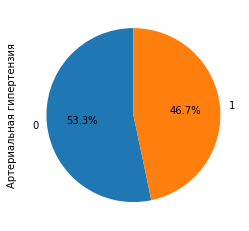

In [8]:
train[target_cols[0]].value_counts().plot(kind='pie', legend = False, autopct="%1.1f%%", startangle=90)

In [9]:
display(train[target_cols[1]].value_counts())
display(train[target_cols[2]].value_counts())
display(train[target_cols[3]].value_counts())
display(train[target_cols[4]].value_counts())

0    914
1     41
Name: ОНМК, dtype: int64

0    838
1    117
Name: Стенокардия, ИБС, инфаркт миокарда, dtype: int64

0    859
1     96
Name: Сердечная недостаточность, dtype: int64

0    869
1     86
Name: Прочие заболевания сердца, dtype: int64

In [10]:
for col in train.columns:
#     print(col)
    print(train[col].value_counts(), '\n')
#     print(train[col].unique())

Ж    667
М    287
Name: Пол, dtype: int64 

в браке в настоящее время                          563
вдовец / вдова                                     143
в разводе                                          125
гражданский брак / проживание с партнером           79
никогда не был(а) в браке                           43
раздельное проживание (официально не разведены)      2
Name: Семья, dtype: int64 

европейская                                                                                                      931
другая азиатская (Корея, Малайзия, Таиланд, Вьетнам, Казахстан, Киргизия, Туркмения, Узбекистан, Таджикистан)     17
прочее (любая иная этно-расовая группа, не представленная выше)                                                    7
Name: Этнос, dtype: int64 

Русские                  899
Татары                    18
Немцы                      6
Чуваши                     5
Украинцы                   4
Азербайджанцы              4
Казахи                     2
Евреи           

### replace nan's

In [11]:
# replace nan's
train['Пол'] = train['Пол'].fillna('м')
train['Возраст курения'] = train['Возраст курения'].fillna(0)
train['Сигарет в день'] = train['Сигарет в день'].fillna(0)
train['Частота пасс кур'] = train['Частота пасс кур'].fillna(0)
train['Возраст алког'] = train['Возраст алког'].fillna(0)

test['Возраст курения'] = test['Возраст курения'].fillna(0)
test['Сигарет в день'] = test['Сигарет в день'].fillna(0)
test['Частота пасс кур'] = test['Частота пасс кур'].fillna(0)
test['Возраст алког'] = test['Возраст алког'].fillna(0)

Object to cat codes (for corr plot)

Only for corr plot, reload train for cells after

In [12]:
for col in train.columns:
    if train[col].dtype == 'O':
        train[col] = train[col].astype('category').cat.codes

<AxesSubplot:>

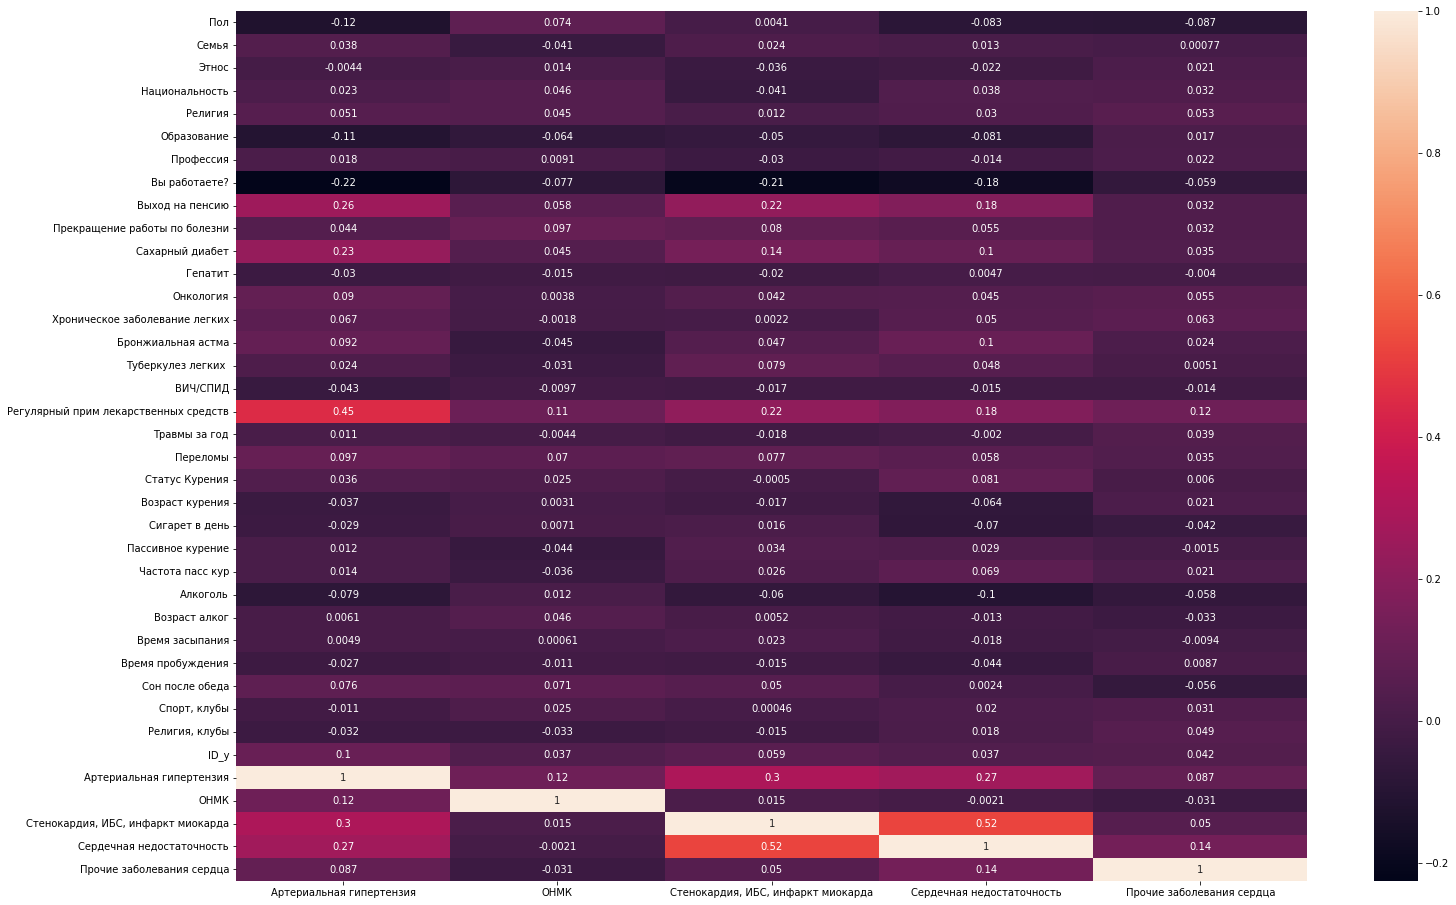

In [13]:
plt.figure(figsize=(24,16))
sns.heatmap(train.corr()[target_cols], annot = True)

In [14]:
train = pd.read_csv('../input/predicting-the-risk-cardiovascular-disease/train_dataset_train/train.csv', index_col=0)

### New features

In [15]:
from datetime import datetime, time as datetime_time, timedelta

def time_diff(start, end):
    if isinstance(start, datetime_time): # convert to datetime
        assert isinstance(end, datetime_time)
        start, end = [datetime.combine(datetime.min, t) for t in [start, end]]
    if start <= end: # e.g., 10:33:26-11:15:49
        return end - start
    else: # end < start e.g., 23:55:00-00:25:00
        end += timedelta(1) # +day
        assert end > start
        return end - start
    
def compute_sleep_time(x):
    return time_diff(datetime.strptime(x['Время засыпания'], '%H:%M:%S'), datetime.strptime(x['Время пробуждения'], '%H:%M:%S')).seconds//3600

train['Время сна'] = train[['Время засыпания', 'Время пробуждения']].apply(lambda x: compute_sleep_time(x), axis=1)

<AxesSubplot:>

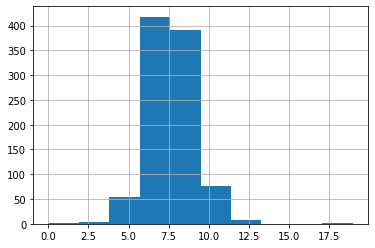

In [16]:
train['Время сна'].hist(bins=10)

Возраст курения


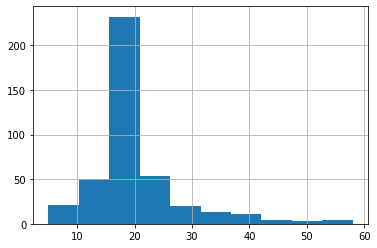

Сигарет в день


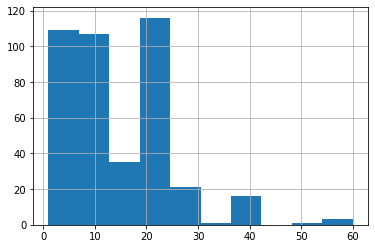

Возраст алког


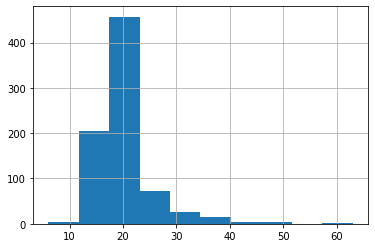

In [17]:
for col in train.columns:
    if train[col].dtype == 'float64':
        print(col)
        plt.show((train[col].hist(bins=10)))

<AxesSubplot:>

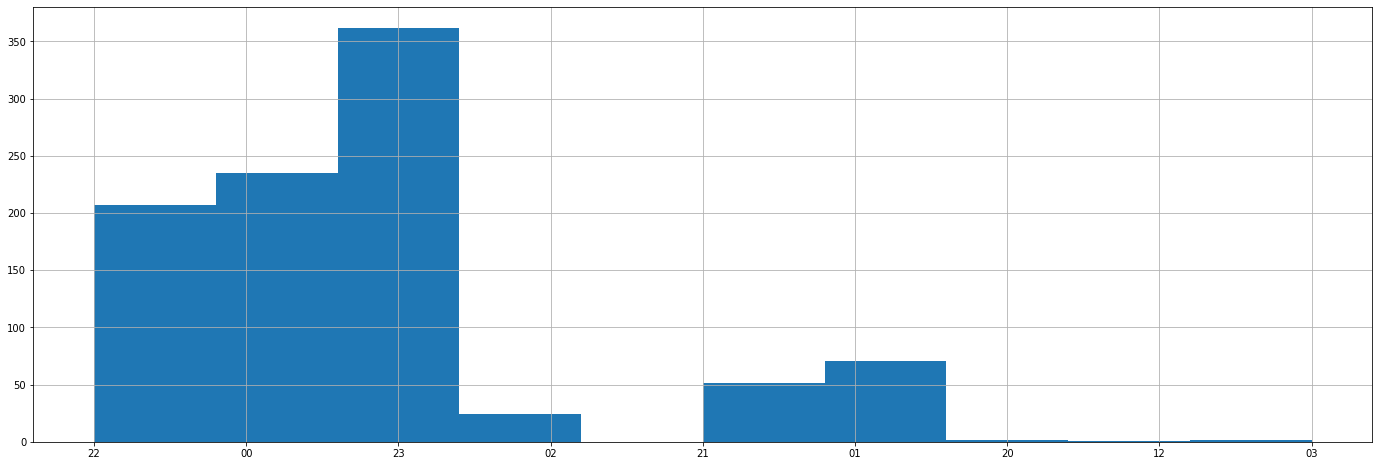

In [18]:
train['Время засыпания'].str.split(':').str[0].hist(figsize=(24,8))

<AxesSubplot:>

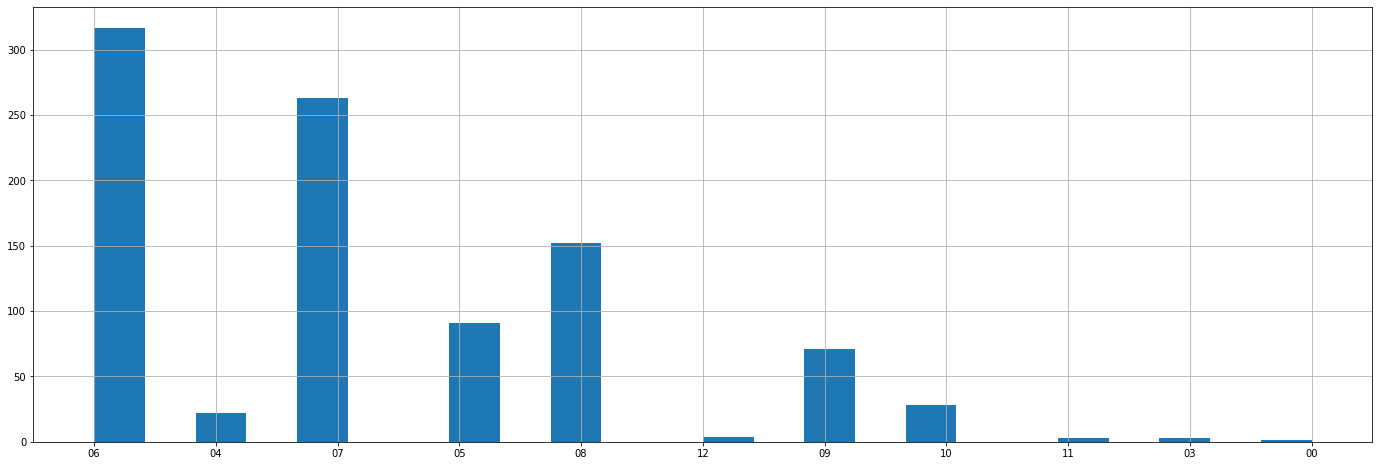

In [19]:
train['Время пробуждения'].str.split(':').str[0].hist(figsize=(24,8), bins=24)